In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')
from nanoscopy import spm
from nanoscopy import spectrum
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory 

In [4]:
def to_nm(x):
    return x * 1e-9

def from_nm(x):
    return x * 1e9

class STM_API():
    def __init__(self):
        self.root_url = 'http://127.0.0.1:8001/STMService/'



In [ ]:
url = 'http://127.0.0.1:8001/STMService/GetTipPosition'
response = requests.get(url)
res = response.json()
x, y = res['X (m)'], res['Y (m)']
print(from_nm(x), 'nm', from_nm(y), 'nm')

4.0 nm 4.0 nm


In [ ]:
url = f'http://127.0.0.1:8001/STMService/SetTipPosition'
x, y = 0, 0
payload = {'x': to_nm(x), 'y': to_nm(y)}
response = requests.post(url, data=payload)
response.json()

{'postdata': 'x=0.0&y=0.0'}

In [ ]:
url = f'http://127.0.0.1:8001/STMService/SetScan'
payload = {'x': 1e-9, 'y': 1e-9, 'width': 10e-9, 'height': 10e-9, 'angle': 0}
response = requests.post(url, data=payload)
response.json()

{'postdata': 'x=1e-09&y=1e-09&width=1e-08&height=1e-08&angle=0'}

In [ ]:
url = f'http://127.0.0.1:8001/STMService/SetScanProperties'
no_change = 0
on = 1
off = 2
comment = 'Base Pressure in LT: 7.3e-12 Torr, LN2, 1E9 gain'
payload = {'Continuous_scan': off, 'Bouncy_scan': off, 'Auto_save': no_change, 'Series_name': '', 'Comment': comment}
response = requests.post(url, data=payload)
response.json()

{'postdata': 'Continuous_scan=2&Bouncy_scan=2&Auto_save=0&Series_name=&Comment=Base+Pressure+in+LT%3A+4.7e-10+Torr%2C+LN2%2C+1E9+gain'}

In [ ]:
url = f'http://127.0.0.1:8001/STMService/SetTipPosition'

x_range = np.arange(5)
for x in x_range:
    for y in x_range:
        payload = {'x': to_nm(x), 'y': to_nm(y)}
        response = requests.post(url, data=payload)
        # print(response.json())

response = requests.post(url, data={'x': 0, 'y': 0})

In [ ]:
url = 'http://127.0.0.1:8001/STMService/GetScan'
current_channel = 'Current (A)'
bias_channel = 'Bias (V)'
height_channel = 'Z (m)'
payload = {'channel': height_channel}
response = requests.get(url, params=payload)
res = response.json()

{'Channel name': 'Z (m)',
 'Scan frame data': [[1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.54e-07,
   1.5

In [ ]:
res['Channel name']

'Z (m)'

In [ ]:
scan_frame = np.array(res['Scan frame data'])
scan_frame.shape

(128, 128)

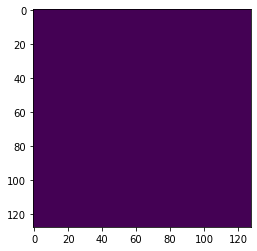

In [ ]:
plt.imshow(scan_frame)
plt.show()